In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt

# Correr algoritmos

In [2]:
def correr_instancia(algoritmo, n): 
    result = subprocess.run([f'../cpp/{algoritmo}.cpp'], stdout=subprocess.PIPE, input=n, encoding='ascii')
    return int(result.stdout.split('\n')[0])

In [3]:
# Ejemplo de corrida
correr_instancia('kahan', '10000')

OSError: [Errno 8] Exec format error: '../cpp/kahan.cpp'

In [4]:
resultados = []
algoritmos = ['kahan', 'sorting', 'comoviene']
#for n in [10**x for x in range(7)]:
for n in range(0, 10000, 100):
    if n%1000==0:
        print(n)
    for algoritmo in algoritmos:
        for _ in range(10):
            tiempo =  correr_instancia(algoritmo, str(n))
            resultados.append([n, algoritmo, tiempo])

df_resultados = pd.DataFrame(resultados, columns=['n', 'algoritmo', 'tiempo'])

0


OSError: [Errno 8] Exec format error: '../cpp/kahan.cpp'

In [52]:
df_resultados.head()

,n,algoritmo,tiempo
0,0,kahan,177
1,0,kahan,178
2,0,kahan,103
3,0,kahan,118
4,0,kahan,167


# Analizar resultados

# Comparacion algoritmos

In [53]:
df_algoritmo = df_resultados.groupby(['n', 'algoritmo'])['tiempo'].mean().reset_index()
df_algoritmo.head()

,n,algoritmo,tiempo
0,0,comoviene,162.7
1,0,kahan,156.3
2,0,sorting,461.6
3,100,comoviene,582.0
4,100,kahan,1367.0


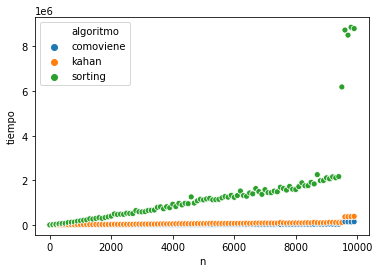

In [54]:
sns.scatterplot(data=df_algoritmo, x='n', y='tiempo', hue='algoritmo')

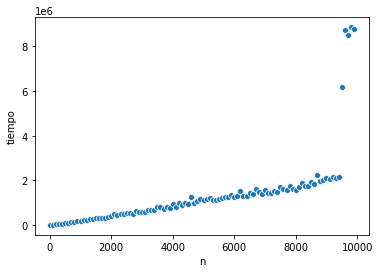

In [55]:
sns.scatterplot(data=df_algoritmo[df_algoritmo['algoritmo'] == 'sorting'], x='n', y='tiempo')

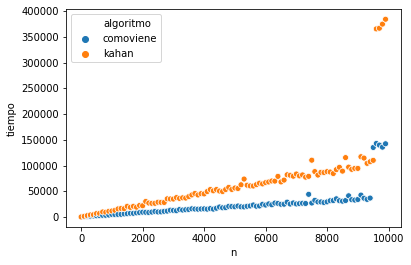

In [56]:
sns.scatterplot(data=df_algoritmo[df_algoritmo['algoritmo'] != 'sorting'], x='n', y='tiempo', hue='algoritmo')